<a href="https://colab.research.google.com/github/NikolayIvTkachenko/Colab_Python_AI_NeuroNetwork/blob/main/NeuroNetwork_CNN_003.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
!wget https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz

--2025-10-20 19:53:18--  https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
Resolving www.cs.toronto.edu (www.cs.toronto.edu)... 128.100.3.30
Connecting to www.cs.toronto.edu (www.cs.toronto.edu)|128.100.3.30|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 170498071 (163M) [application/x-gzip]
Saving to: ‘cifar-10-python.tar.gz’

cifar-10-python.tar 100%[===================>] 162.60M  17.9MB/s    in 10s     

2025-10-20 19:53:29 (15.6 MB/s) - ‘cifar-10-python.tar.gz’ saved [170498071/170498071]



In [3]:
cifar = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 11s 0us/step


In [4]:
!tar -xvzf cifar-10-python.tar.gz

cifar-10-batches-py/
cifar-10-batches-py/data_batch_4
cifar-10-batches-py/readme.html
cifar-10-batches-py/test_batch
cifar-10-batches-py/data_batch_3
cifar-10-batches-py/batches.meta
cifar-10-batches-py/data_batch_2
cifar-10-batches-py/data_batch_5
cifar-10-batches-py/data_batch_1


In [5]:

def unpickle(file):
  import pickle
  with open(file, 'rb') as fo:
    dict = pickle.load(fo, encoding='bytes')
    return dict

In [22]:
def load_data(file_location):
  x_train = None
  y_train = None

  #Education data
  for i in [1, 2, 3, 4, 5]:
    db_dict = unpickle(file_location + "data_batch_"+str(i))
    data_points = len(db_dict[b'data'])
    data = db_dict[b'data'].reshape((data_points, 3, 32, 32)).transpose((0, 2, 3, 1))
    if x_train is None:
      x_train = data
      y_train = db_dict[b'labels']
    else:
      x_train = np.concatenate((x_train, data))
      y_train = np.concatenate((y_train, db_dict[b'labels']))
  #Test data
  db_dict = unpickle(file_location+"test_batch")
  data_points = len(db_dict[b'data'])
  x_test = db_dict[b'data'].reshape((data_points, 3, 32, 32)).transpose((0, 2, 3, 1))
  y_test = np.array(db_dict[b'labels'])

  return (x_train, y_train), (x_test, y_test)


In [23]:
meta_dict = unpickle("./cifar-10-batches-py/batches.meta")
meta_dict[b'label_names']

[b'airplane',
 b'automobile',
 b'bird',
 b'cat',
 b'deer',
 b'dog',
 b'frog',
 b'horse',
 b'ship',
 b'truck']

In [24]:
(x_train, y_train), (x_test, y_test) = load_data("./cifar-10-batches-py/")
x_train, x_test = x_train / 255.0, x_test / 255.0

In [25]:
print(x_train.shape)
print(y_train.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000,)
(50000,)
(10000,)


Label value: 9 and label name: b'truck' 


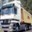

In [26]:
print("Label value: {0} and label name: {1} ".format(y_train[1], meta_dict[b'label_names'][y_train[1]]))
tf.keras.utils.array_to_img(x_train[1])